In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "darkgrid")

In [3]:
df = pd.read_csv('assignment_03_fortune500.csv')

In [3]:
# Investigating the dataset

In [4]:
df.head()

,Unnamed: 0,Rank,Company,Revenues ($ millions),Profits ($ millions),Year
0,0,1,General Motors,9823.5,806.0,1955
1,1,2,Exxon Mobil,5661.4,584.8,1955
2,2,3,U.S. Steel,3250.4,195.4,1955
3,3,4,General Electric,2959.1,212.6,1955
4,4,5,Esmark,2510.8,19.1,1955


In [5]:
df.tail()

,Unnamed: 0,Rank,Company,Revenues ($ millions),Profits ($ millions),Year
25495,95,496,Wm. Wrigley Jr.,3648.6,493.0,2005
25496,96,497,Peabody Energy,3631.6,175.4,2005
25497,97,498,Wendy's International,3630.4,57.8,2005
25498,98,499,Kindred Healthcare,3616.6,70.6,2005
25499,99,500,Cincinnati Financial,3614.0,584.0,2005


In [6]:
# Matching the names to the data columns

In [7]:
df.columns = ['unnamed', 'rank', 'company', 'revenue', 'profit', 'year'] 

In [8]:
len(df)

25500

In [9]:
# Checking data types

In [10]:
df.dtypes

unnamed      int64
rank         int64
company     object
revenue    float64
profit      object
year         int64
dtype: object

In [11]:
# Investigating those data with data types not as expected

In [12]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,unnamed,rank,company,revenue,profit,year
228,28,229,Norton,135.0,N.A.,1955
290,90,291,Schlitz Brewing,100.0,N.A.,1955
294,94,295,Pacific Vegetable Oil,97.9,N.A.,1955
296,96,297,Liebmann Breweries,96.0,N.A.,1955
352,52,353,Minneapolis-Moline,77.4,N.A.,1955


In [13]:
# Finding the problematic data

In [14]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [15]:
len(df.profit[non_numberic_profits])

369

In [16]:
# Analysing if acceptable to remove the problematic data

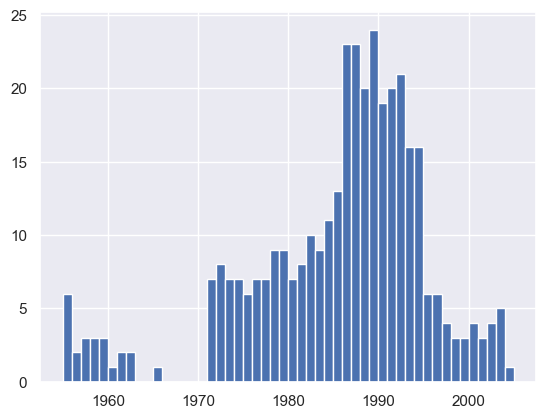

In [17]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins = range(1955, 2006))

In [18]:
# Removing the problematic data

In [19]:
df = df.loc[~non_numberic_profits]

In [20]:
df.profit = df.profit.apply(pd.to_numeric)

In [21]:
# Checking if the data types are okay to proceed analysis

In [22]:
len(df)

25131

In [23]:
df.dtypes

unnamed      int64
rank         int64
company     object
revenue    float64
profit     float64
year         int64
dtype: object

In [24]:
# Defining variables and method for repeatedly used codes

In [25]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x = 0, y = 0)

In [26]:
# Plotting average profits by year

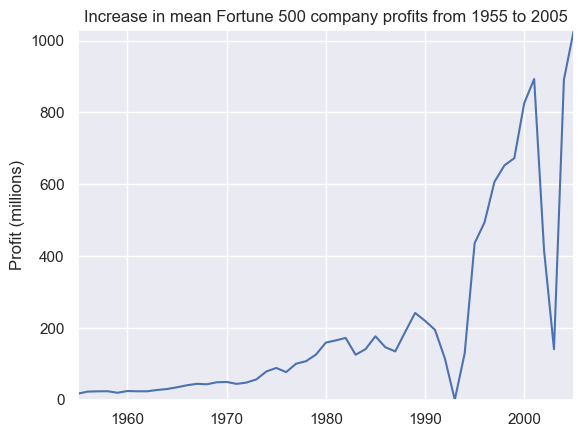

In [27]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

In [28]:
# Plotting average revenues by year

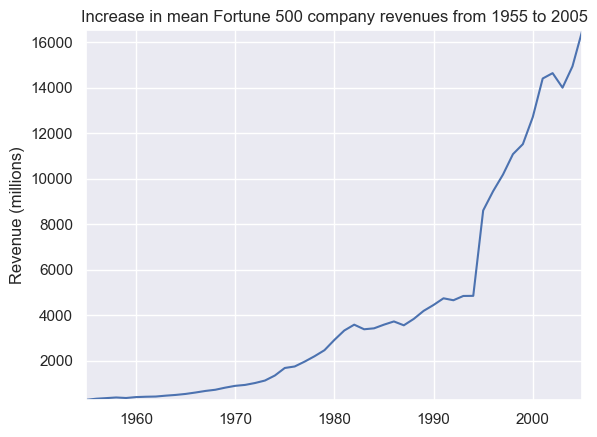

In [29]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

In [30]:
# Superimposing Standard Deviations for more insights

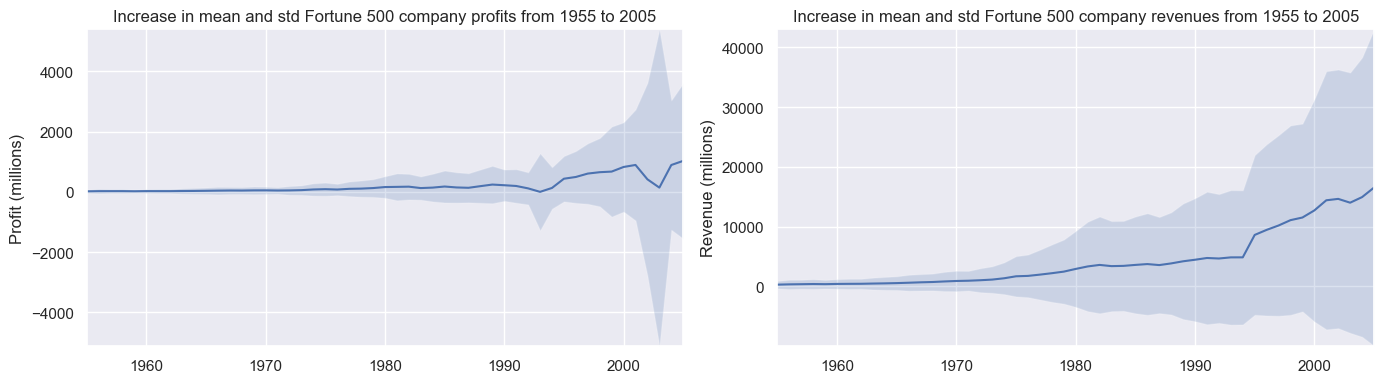

In [31]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha = 0.2)
    plot(x, y, ax, title, y_label)
    
fig, (ax1, ax2) = plt.subplots(ncols = 2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.to_numpy()   # using to_numpy() 
stds2 = group_by_year.std().revenue.to_numpy()   # using to_numpy() 
plot_with_std(x, y1.to_numpy(), stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.to_numpy(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()